In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [59]:
traffic_history = pd.read_csv("Traffic_record.csv")
print(traffic_history.head())

# Format the date
traffic_history["Date_traffic"] = pd.to_datetime(traffic_history["Date_traffic"], format="%d/%m/%Y")
print(traffic_history.info())


  Date_traffic  Views_per_day
0   01/06/2021           7831
1   02/06/2021           7798
2   03/06/2021           7401
3   04/06/2021           7054
4   05/06/2021           7973
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_traffic   391 non-null    datetime64[ns]
 1   Views_per_day  391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


<Figure size 640x480 with 0 Axes>

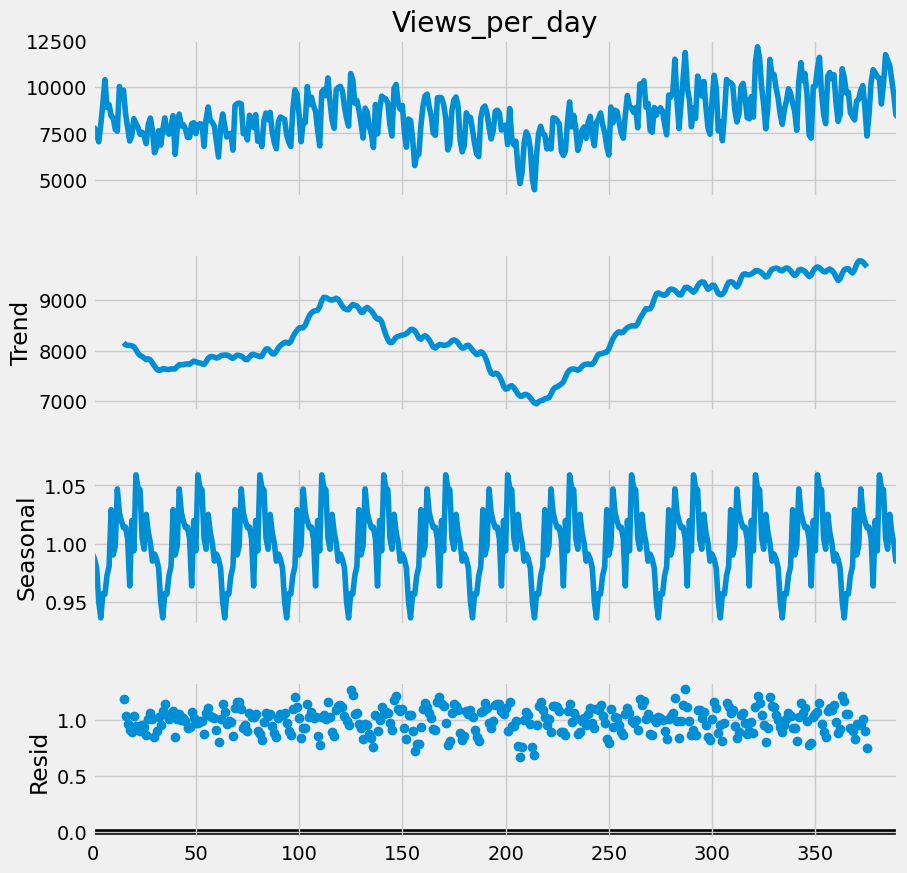

In [60]:
# Plot seasonal traffic because website traffic is seasonal - d=1
seasonal_traffic = seasonal_decompose(traffic_history["Views_per_day"], model='multiplicative', period = 30)
figure_seasonal = plt.figure()  
figure_seasonal = seasonal_traffic.plot()  
figure_seasonal.set_size_inches(10, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

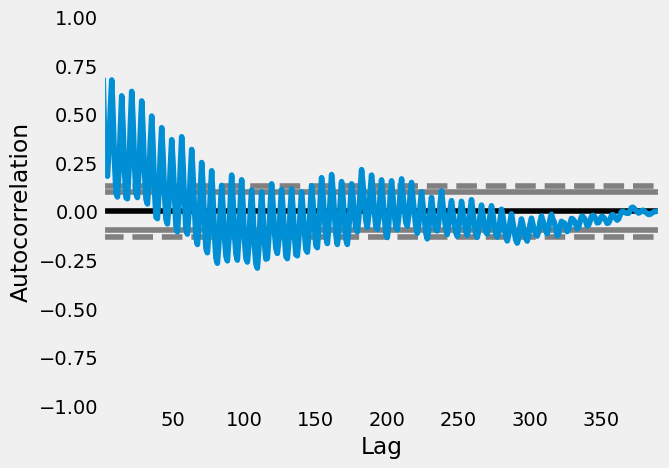

In [61]:
# Value of p
pd.plotting.autocorrelation_plot(traffic_history["Views_per_day"])

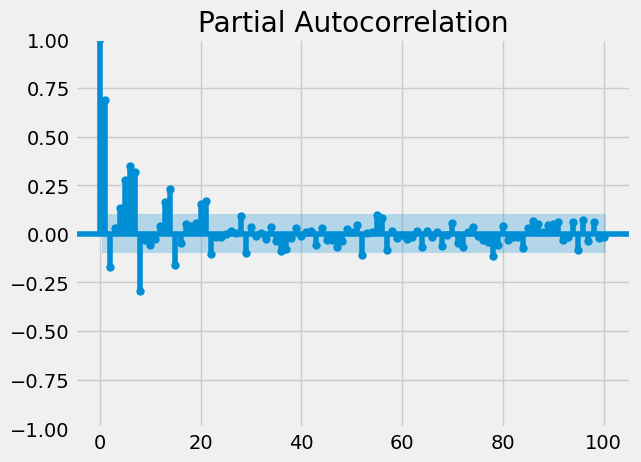

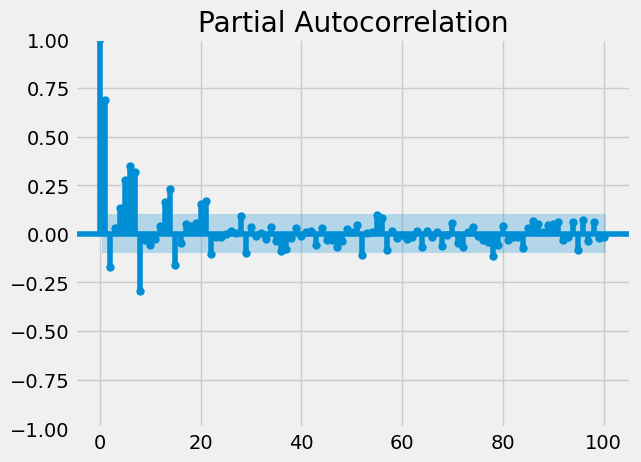

In [62]:
# Value of q
plot_pacf(traffic_history["Views_per_day"], lags = 100)

In [63]:
# Train the model on the predicted p,d,q values
p, d, q = 5, 1, 2
model_used=sm.tsa.statespace.SARIMAX(traffic_history['Views_per_day'],order=(p, d, q),seasonal_order=(p, d, q, 12))
model_used=model_used.fit()
print(model_used.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26940D+00    |proj g|=  5.28062D-01

At iterate    5    f=  8.06764D+00    |proj g|=  4.51780D-02

At iterate   10    f=  8.01428D+00    |proj g|=  4.59155D-02

At iterate   15    f=  7.98073D+00    |proj g|=  1.14090D-01

At iterate   20    f=  7.96097D+00    |proj g|=  1.73117D-02

At iterate   25    f=  7.95078D+00    |proj g|=  2.22008D-01

At iterate   30    f=  7.94314D+00    |proj g|=  1.86072D-01

At iterate   35    f=  7.93773D+00    |proj g|=  1.40201D-02

At iterate   40    f=  7.93367D+00    |proj g|=  3.75003D-02

At iterate   45    f=  7.93029D+00    |proj g|=  1.74177D-01

At iterate   50    f=  7.92586D+00    |proj g|=  1.93922D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [64]:
# Predictions for the next 30 days
predicted_month = model_used.predict(len(traffic_history), len(traffic_history)+30)
print(predicted_month)

391     9897.294142
392    10809.358205
393    10717.618857
394     9817.322547
395     8758.996869
396     8233.582918
397     8953.421966
398     9732.229494
399    10322.572361
400    10583.907581
401     9846.110226
402     9307.594395
403     8998.862863
404     9093.335928
405    10514.988672
406    11004.812548
407    10889.243910
408    10026.573997
409     9375.841084
410     8606.266278
411     9209.792648
412    10379.856288
413    10654.574086
414    10800.007087
415    10215.604524
416     9372.197193
417     8962.452402
418     9179.459418
419     9960.043206
420    10287.063167
421    10724.717279
Name: predicted_mean, dtype: float64


<Axes: >

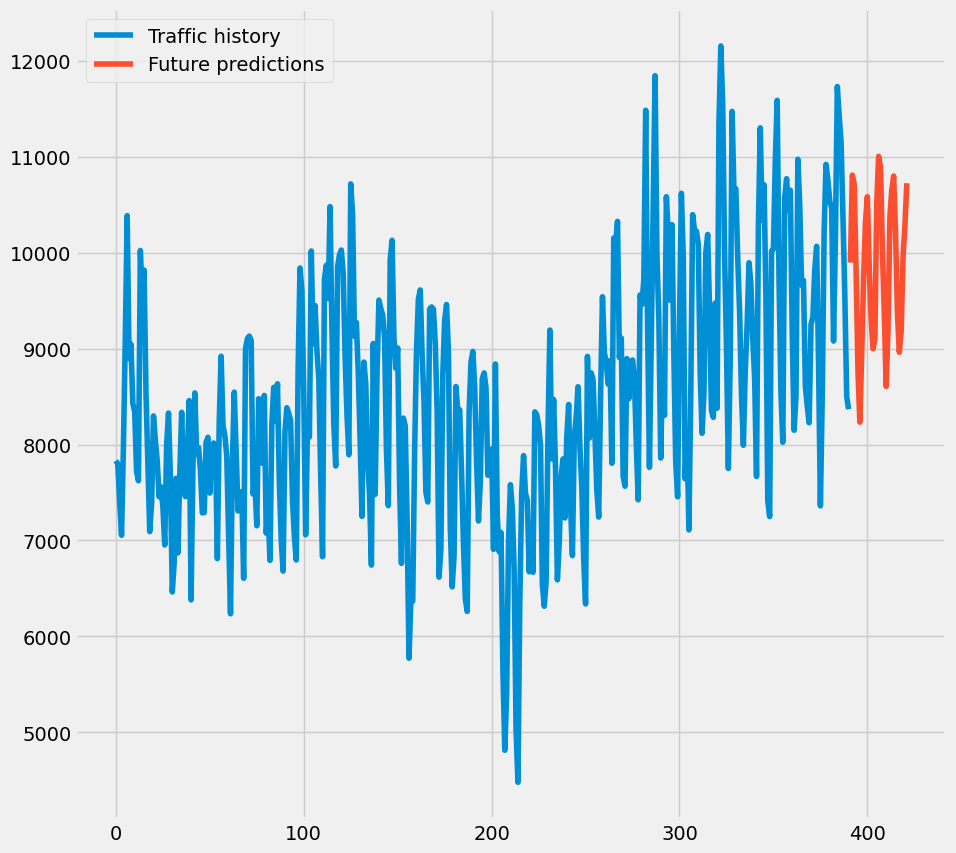

In [65]:
# Plotting the predicted traffic
traffic_history["Views_per_day"].plot(legend=True, label="Traffic history", figsize=(10, 10))
predicted_month.plot(legend=True, label= "Future predictions")
